In [4]:
import wandb
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

entity = "jaesikyoon"
project = "ocrl-agentlearning"
default_tags = ["toplot", "sparserewtype", "hardmode"]

# envs
envs = [
        [
            "targetN4C4S3S1",
            "pushN3C4S1S1",
            "oddoneoutN4C2S2S1oc",
            "oddoneoutN4C2S2S1",
        ]
]
envs = np.array(envs)

# titles
titles = [
        [
            "Object Goal Task",
            "Object Interaction Task",
            "Object Comparison Task",
            "Property Comparison Task",
        ],
        ]

# colormap
import distinctipy
cm = distinctipy.get_colors(12,pastel_factor=0.1, colorblind_type="Deuteranomaly", rng=2345)
#cm = plt.cm.get_cmap("tab20").colors + plt.cm.get_cmap("Dark2").colors
# models
models = {
    "GT": {
        "tags": ["gt"],
        "line_cm": cm[0],
        "range_cm": cm[0],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "CNN": {
        "tags": ["cnn", "pooling-identity"],
        "line_cm": cm[1],
        "range_cm": cm[1],
        "marker": "v",
        "fill_style": "full",
        "line_style": "dashed",
    },
    "CNNFeat": {
        "tags": ["cnnfeat"],
        "line_cm": cm[2],
        "range_cm": cm[2],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "MultiCNNs": {
        "tags": ["multicnns"],
        "line_cm": cm[3],
        "range_cm": cm[3],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "VAE": {
        "tags": ["vae"],
        "line_cm": cm[4],
        "range_cm": cm[4],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "MAE-CLS": {
        "tags": ["mae-cls"],
        "line_cm": cm[5],
        "range_cm": cm[5],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "SLATE-CNN": {
        "tags": ["slate-cnn"],
        "line_cm": cm[6],
        "range_cm": cm[6],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "MAE-Patch": {
        "tags": ["mae-patch"],
        "line_cm": cm[7],
        "range_cm": cm[7],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "SLATE": {
        "tags": ["slate"],
        "line_cm": cm[8],
        "range_cm": cm[8],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "Slot-Attention": {
        "tags": ["slotattention"],
        "line_cm": cm[9],
        "range_cm": cm[9],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "Slot-Attention-Large": {
        "tags": ["slotattention-large"],
        "line_cm": cm[10],
        "range_cm": cm[10],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "IODINE": {
        "tags": ["iodine"],
        "line_cm": cm[11],
        "range_cm": cm[11],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
}
print(f"Models: {models.keys()}")

Models: dict_keys(['GT', 'CNN', 'CNNFeat', 'MultiCNNs', 'VAE', 'MAE-CLS', 'SLATE-CNN', 'MAE-Patch', 'SLATE', 'Slot-Attention', 'Slot-Attention-Large', 'IODINE'])


GT [0.9743333429098129, 0.7949999988079071, 0.973333336909612, 0.9676666696866353]
CNN [0.9873333434263866, 0.7840000033378601, 0.22533333251873652, 0.23166666726271312]
CNNFeat [0.9763333419958751, 0.2909999985868732, 0.19233333319425583, 0.188666666050752]
MultiCNNs [0.9736666758855184, 0.48999999860922494, 0.5373333295186361, 0.5673333297173182]
VAE [0.6740000009536743, 0.34000000208616254, 0.3856666644414266, 0.3873333324988683]
MAE-CLS [0.4479999949534734, 0.12866666683306296, 0.20866666833559672, 0.2056666649878025]
SLATE-CNN [0.9049999992052714, 0.40933333163460095, 0.24866666595141093, 0.22966666420300802]
MAE-Patch [0.9013333320617676, 0.04866666595141093, 0.21633333265781401, 0.21866666699449222]
SLATE [0.9853333453337352, 0.7873333315054576, 0.9790000100930532, 0.9800000091393789]
Slot-Attention [0.9830000142256419, 0.0, 0.975000011920929, 0.9473333319028219]
Slot-Attention-Large [0.9856666783491771, 0.046999999632438026, 0.967333334684372, 0.970000006755193]
IODINE [0.91633

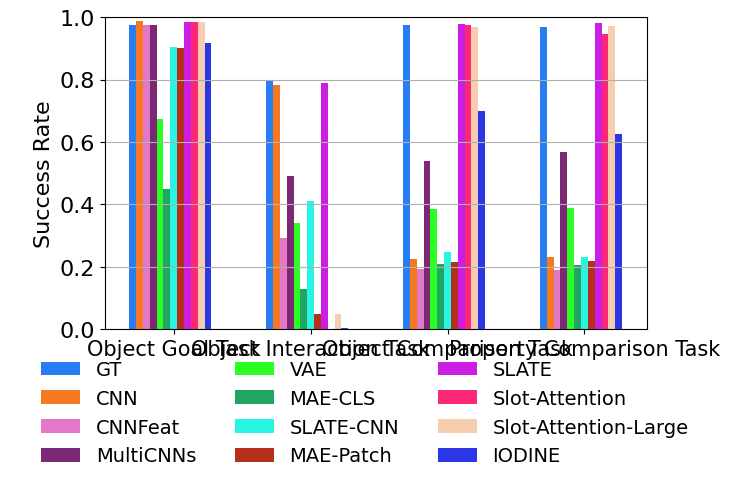

In [6]:
api = wandb.Api(timeout=19)
for i in range(envs.shape[0]):
    results = {}
    for j in range(envs.shape[1]):
        for model_name, model_infos in models.items():
            filters = []
            filters.append({"tags": envs[i,j]})
            for model_tag in model_infos["tags"]:
                filters.append({"tags": model_tag})
            for default_tag in default_tags:
                filters.append({"tags": default_tag})
            #print(filters)
            if model_name == "IODINE" and ((envs[i,j] == "pushN3C4S1S1")):
                runs = api.runs(f"jaesikyoon/ocrl-rl", filters={"$and": filters})
            else:
                runs = api.runs(f"{entity}/{project}", filters={"$and": filters})
            global_steps = []
            success_rates = []
            for run in runs:
                #print(run)
                history = run.scan_history(["global_step","eval/success_rate"])
                _global_step = []
                _success_rate = []
                for row in history:
                    _global_step.append(row["global_step"])
                    _success_rate.append(row["eval/success_rate"])
                global_steps.append(_global_step)
                success_rates.append(_success_rate)
            if not model_name in results.keys():
                results[model_name] = {"mean": [], "std": []}
            if len(global_steps) == 0:  # no logs
                continue
            step = 2000000 // 4000
            # success rates
            for rate_idx in range(len(success_rates)):
                success_rates[rate_idx] = success_rates[rate_idx][:step]
                if len(success_rates[rate_idx]) < 500:
                    success_rates[rate_idx] += [success_rates[rate_idx][-1]] * (500-len(success_rates[rate_idx]))
            sr_steps = global_steps[-1][:step]
            success_rates = np.array(success_rates)
            sr_mean = np.mean(success_rates[:,-10:])
            sr_std = np.std(success_rates[:,-10:])
            results[model_name]["mean"].append(sr_mean)
            results[model_name]["std"].append(sr_std)

GT [0.9743333429098129, 0.7949999988079071, 0.973333336909612, 0.9676666696866353]
CNN [0.9873333434263866, 0.7840000033378601, 0.22533333251873652, 0.23166666726271312]
CNNFeat [0.9763333419958751, 0.2909999985868732, 0.19233333319425583, 0.188666666050752]
MultiCNNs [0.9736666758855184, 0.48999999860922494, 0.5373333295186361, 0.5673333297173182]
VAE [0.6740000009536743, 0.34000000208616254, 0.3856666644414266, 0.3873333324988683]
MAE-CLS [0.4479999949534734, 0.12866666683306296, 0.20866666833559672, 0.2056666649878025]
SLATE-CNN [0.9049999992052714, 0.40933333163460095, 0.24866666595141093, 0.22966666420300802]
MAE-Patch [0.9013333320617676, 0.04866666595141093, 0.21633333265781401, 0.21866666699449222]
SLATE [0.9853333453337352, 0.7873333315054576, 0.9790000100930532, 0.9800000091393789]
Slot-Attention [0.9830000142256419, 0.0, 0.975000011920929, 0.9473333319028219]
Slot-Attention-Large [0.9856666783491771, 0.046999999632438026, 0.967333334684372, 0.970000006755193]
IODINE [0.91633

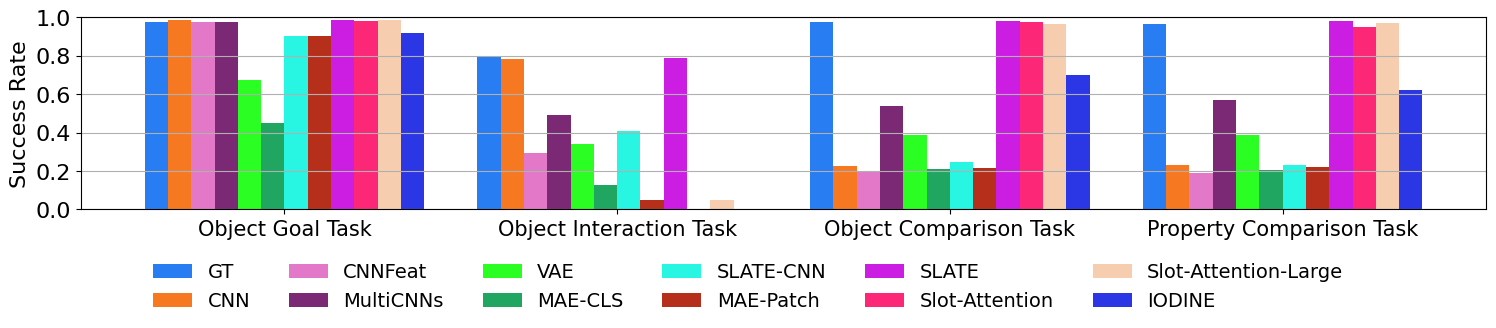

In [7]:
# plots
top = 0.03
hspace = 0.07
bottom = 0.35 if envs.shape[0] != 1 else 0.37
height = (1 - top - bottom - hspace * (envs.shape[0] - 1)) / envs.shape[0]
left = 0.05
wspace = 0.05
#wspace = 0.07
right = 0.013
#width = (1 - left - right - wspace * (envs.shape[1] - 1)) / envs.shape[1]
width = (1 - left - right)
recs = np.zeros((1,1), dtype=object)
for i in range(recs.shape[0]):
    for j in range(recs.shape[1]):
        recs[i, j] = [
            left + j * (width + wspace),  # left
            bottom + (recs.shape[0] - 1 - i) * (height + hspace),  # bottom
            width,
            height,
        ]
plt.figure(figsize=(15 * recs.shape[1], 3.2 * recs.shape[0]))

ax = plt.axes(recs[0, 0])
ax.yaxis.grid(True)
ax.xaxis.offsetText.set_fontsize(22)
axes = plt.gca()
ax.set_ylim([0.0, 1.0])
width = 0.07
X = np.arange(4)
for _cnt, model_name in enumerate(results.keys()):
    print(model_name, results[model_name]["mean"])
    if i == 0:
        ax.bar(X + width*_cnt, results[model_name]["mean"], color=models[model_name]["line_cm"], width=width, label=model_name)
    else:
        ax.bar(X + width*_cnt, results[model_name]["mean"], color=models[model_name]["line_cm"], width=width)
plt.yticks(fontsize=16)
ax.set_ylabel("Success Rate", fontsize=16)
plt.xticks([0.385,1.385,2.385,3.385], fontsize=15)
ax.set_xticklabels(titles[i], fontsize=15)
#plt.xticks(titles[i], fontsize=23)

plt.figlegend(
    loc="lower center",
    #ncol=len(models.keys())//3,
    ncol=6,
    fontsize=14,
    #fontsize=23,
    frameon=False,
)

import json

with open("results/model_wise_performances.json", "w") as f:
    json.dump(results, f)
    
img_name = "icml_bar_each_model_" + datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S")
plt.savefig(img_name + ".png", dpi=300)

In [24]:
plt.savefig(img_name + ".png")

<Figure size 640x480 with 0 Axes>